In [1]:
from Bio import SeqIO
with open("uniprot.fa", "rt") as handle:
    for record in SeqIO.parse(handle, "fasta"):
        print(record.id)

sp|P33487|ABP1_ARATH
sp|P19801|AOC1_HUMAN
sp|P13689|ABP1_MAIZE
sp|Q8JZQ5|AOC1_MOUSE
sp|Q9TRC7|AOC1_PIG


In [2]:
from Bio.Seq import Seq
seq1=Seq('ATGC')
seq2=Seq('ATGG')
print(seq1)
type(seq1)
seq1.reverse_complement()
print(seq1.upper())

ATGC
ATGC


In [3]:
from Bio import pairwise2
alignments = pairwise2.align.globalxx(seq1, seq2)
for alignment in alignments:
    print(alignment)
    #print(pairwise2.format_alignment(*alignment))

Alignment(seqA='ATGC-', seqB='ATG-G', score=3.0, start=0, end=5)
Alignment(seqA='ATGC', seqB='ATGG', score=3.0, start=0, end=4)
Alignment(seqA='AT-GC', seqB='ATGG-', score=3.0, start=0, end=5)


b'Wed Jun  9 22:58:41 CDT 2021\n'
shape (10, 14)
               Rank Country Other  Total Cases  New Cases  Total Deaths  \
Country Other                                                             
USA               1           USA      6862152    33851.0        201980   

               New Deaths  Total Recovered  Active Cases  Serious, Critical  \
Country Other                                                                 
USA                 632.0        4141168.0     2519004.0              14292   

               Tot Cases/1M pop  Deaths/1M pop  Total Tests  Tests/1M pop  \
Country Other                                                               
USA                       20706            609     95032718        286748   

               Population  
Country Other              
USA             331415157  


<AxesSubplot:xlabel='Country Other'>

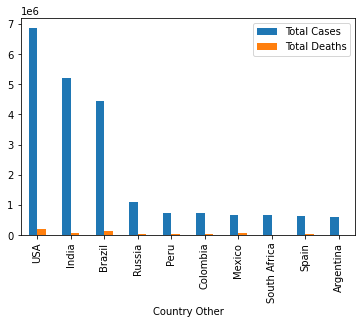

In [125]:
import pandas as pd
import subprocess
#df = pd.read_csv('covid_data.tsv',sep="\t")
print(subprocess.check_output("date",shell=True))
#print(df)

df.index=df['Country Other']
print("shape",df.shape)
#print(df.info())
#print(df.head(5))
#df.tail(5)
#print(df.iloc[1])
print(df[df['Total Cases']==df['Total Cases'].max()])
#df[['Total Cases','Total Deaths']].plot.bar()
#print(df)

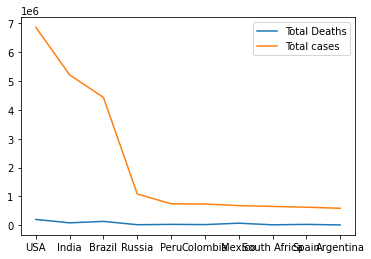

In [94]:
from matplotlib import pyplot as plt
plt.plot(df['Country Other'],df['Total Deaths'])
plt.plot(df['Country Other'],df['Total Cases'])
plt.legend(['Total Deaths','Total cases'])
#plt.xticks(df['Country Other'],rotation=90)
plt.show()

RangeIndex(start=0, stop=10, step=1)


<ipython-input-121-f70a811240b7>:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(df['Country Other'], rotation=90)


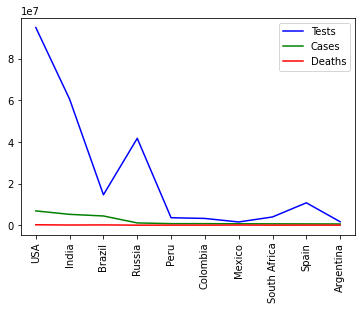

In [121]:
fig, ax = plt.subplots()
df=pd.read_csv('covid_data.tsv',sep="\t")
print(df.index)
ax.plot(df['Country Other'], df['Total Tests'], color = 'b')
ax.plot(df['Country Other'], df['Total Cases'], color = 'g',)
ax.plot(df['Country Other'], df['Total Deaths'], color = 'r',)
ax.set_xticklabels(df['Country Other'], rotation=90)
ax.legend(['Tests','Cases','Deaths'])

plt.savefig("Covid.png",dpi=300)